In [1]:
# Зависимости
import numpy
import pandas as pd
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets
from sklearn.metrics import silhouette_samples

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [3]:
# Приведем полученный набор данных к формату pandas.DataFrame
x = pd.DataFrame(test_x)
print(x)

             0          1
0     8.313941  11.128179
1     8.214779  10.558368
2     4.408202   3.431375
3    -0.114976   8.357885
4     1.679611   2.047945
...        ...        ...
4995  6.248349  10.767097
4996  2.501032   3.841965
4997  6.938015   5.131979
4998  5.097978   7.317108
4999 -0.878110   7.479007

[5000 rows x 2 columns]


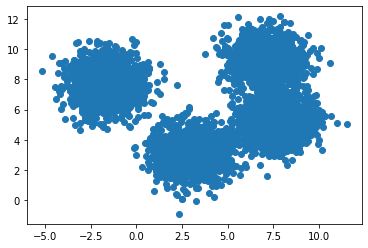

In [4]:
# Отобразим полученный набор данных в виде точек на плоскости
matplotlib.pyplot.scatter(x[0], x[1])
matplotlib.pyplot.show()

In [5]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

9816.775227728938


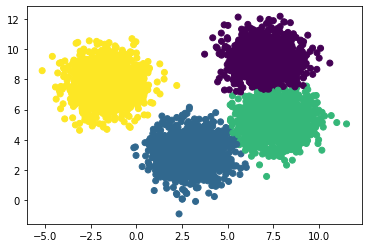

In [6]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(x[0], x[1], c = y)
matplotlib.pyplot.show()    

In [7]:
# Загрузите файл "worldcities.csv" в DataFrame.

# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataframe = pd.read_csv("datasets/worldcities.csv")


In [8]:
# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataframe['lng']
dataframe['lat']
dataframe

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795
...,...,...,...,...,...,...,...,...,...,...,...
12954,Sturgis,Sturgis,44.4111,-103.4975,United States,US,USA,South Dakota,NaN,6862.0,1840002174
12955,Tea,Tea,43.4515,-96.8346,United States,US,USA,South Dakota,NaN,5415.0,1840002841
12956,Brandon,Brandon,43.5928,-96.5799,United States,US,USA,South Dakota,NaN,9263.0,1840002650
12957,Madison,Madison,44.0062,-97.1084,United States,US,USA,South Dakota,NaN,6983.0,1840002540


In [9]:
# Отобразите полученный DataFrame в виде точек, где координаты по оси X берутся из столбца 'lng', а координаты по оси Y - из столбца 'lat'.
x='lng'
y='lat'
new_data = dataframe[[x, y]]
print(new_data)

            lng      lat
0       20.7458  42.4822
1       20.7397  42.2139
2       20.6897  42.9144
3       21.5803  42.5781
4       21.3583  42.3214
...         ...      ...
12954 -103.4975  44.4111
12955  -96.8346  43.4515
12956  -96.5799  43.5928
12957  -97.1084  44.0062
12958 -103.8564  44.6640

[12959 rows x 2 columns]


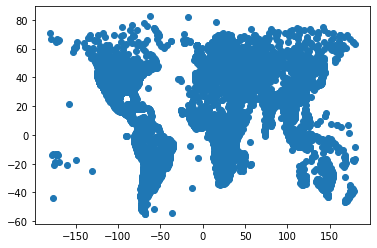

In [10]:
new_data = dataframe[[x, y]]
matplotlib.pyplot.scatter(new_data['lng'], new_data['lat'])
matplotlib.pyplot.show()

In [11]:
# Создайте пустой список inertia для хранения результатов вычислительных экмпериментов.
inertia=[]
k=[]

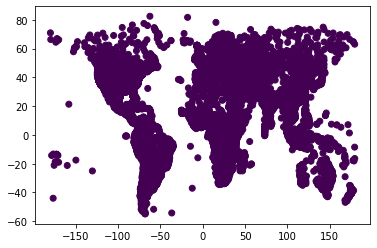

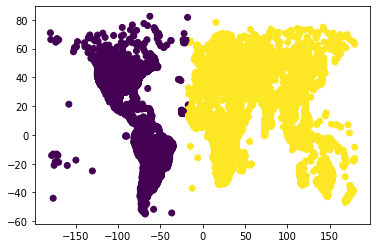

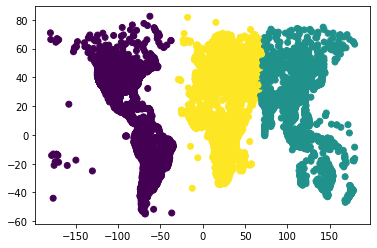

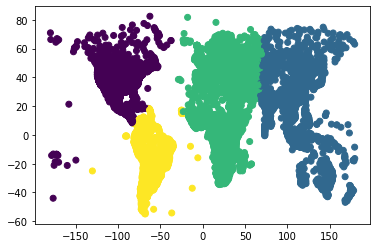

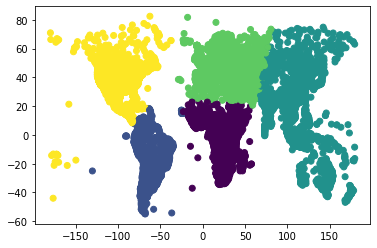

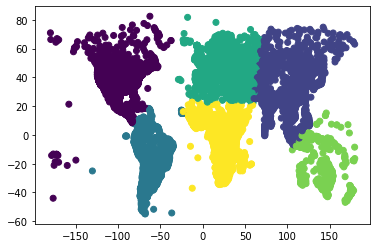

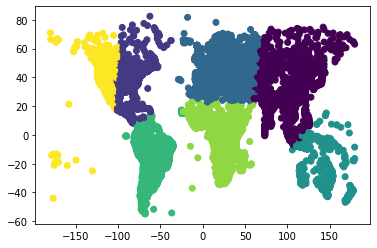

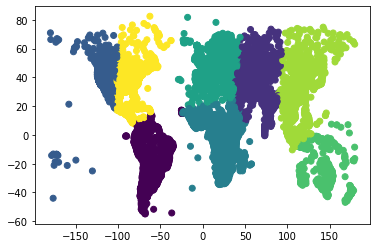

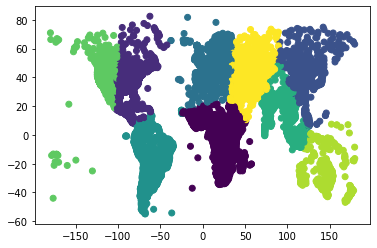

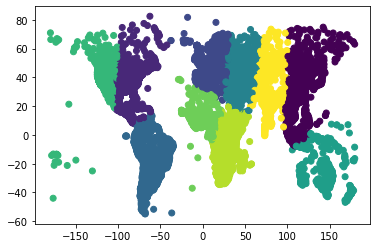

In [12]:
# Напишите цикл по количеству кластеров от 1 до 10.
# В цикле запускайте алгоритм k-средних с текущим количеством кластеров,
# добавляйте в список inertia значение для текущего результата работы алгоритма,
# отобразите набор данных, используя разные цвета для разных кластеров.
# Все шаги делайте по аналогии с примером выше.
for i in range(1,11):
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    y = kmeans.fit_predict(new_data)
    inertia.append(kmeans.inertia_)
    k.append(i)
    matplotlib.pyplot.scatter(new_data['lng'], new_data['lat'], c = y)
    matplotlib.pyplot.show()

In [13]:
#Поиск максимального Коэффициент силуэта
smax=-1
for i in range(2,11):
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    y = kmeans.fit_predict(new_data)
    s= sum(silhouette_samples(new_data,y))/len(new_data)
    if s>smax:
        smax=s
        k1=i

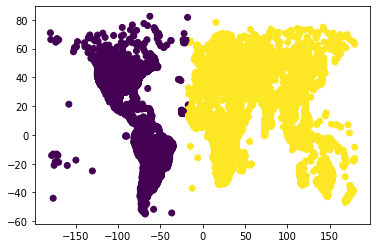

In [14]:
kmeans = sklearn.cluster.KMeans(n_clusters = k1)
y = kmeans.fit_predict(new_data)
matplotlib.pyplot.scatter(new_data['lng'], new_data['lat'], c = y)
matplotlib.pyplot.show()

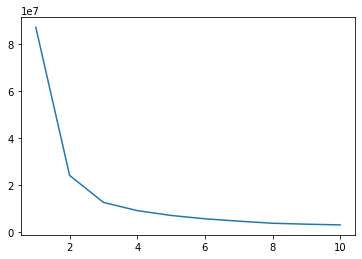

In [15]:
# Постройте график изменения величины inertia от количества кластеров.
matplotlib.pyplot.plot(k,inertia)
matplotlib.pyplot.show()